Assignment

In this assignment you will work with a beer data set. Please provide an answer to the questions below. Answer as many questions as possible:

1. Rank the top 3 breweries which produce the strongest beers.
2. Which year did beers enjoy the highest ratings?
3. Based on the users' ratings, which factors are important among taste, aroma, appearance, and palette?
4. If you were to recommend 3 beers to your friends based on this data, which ones would you recommend?
5. Which beer style seems to be the favourite based on the reviews written by users? How does written reviews compare to overall review score for the beer style?

Data Description

The provided compressed file BeerDataScienceProject.tar.bz2 contains data about beers and their reviews. It has the following columns:

beer_ABV - alcohol by volume
beer_beerId - beer ID
beer_brewerId - beer brewer ID
beer_name - beer name
beer_style - beer style
review_appearance - review on the beer's appearance
review_palette - review on the beer's palette (colours)
review_overall - overall beer review
review_taste - review on the beer's taste
review_profileName - profile name of the reviewer
review_aroma - review on the beer's aroma
review_text - the full text of the review
review_time - timestamp when the review was made

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk import download
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
df = pd.read_csv("BeerDataScienceProject.tar.bz2", compression="bz2")

In [3]:
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


# pre-question data analysis

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            528870 non-null  float64
 1   beer_beerId         528870 non-null  int64  
 2   beer_brewerId       528870 non-null  int64  
 3   beer_name           528870 non-null  object 
 4   beer_style          528870 non-null  object 
 5   review_appearance   528870 non-null  float64
 6   review_palette      528870 non-null  float64
 7   review_overall      528870 non-null  float64
 8   review_taste        528870 non-null  float64
 9   review_profileName  528755 non-null  object 
 10  review_aroma        528870 non-null  float64
 11  review_text         528870 non-null  object 
 12  review_time         528870 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 52.5+ MB


Three features have null values: beer_ABV, review_profileName, review_text. 8 features are numerical, the other 4 object. These four features seem like categorical features.

In [5]:
df["beer_name"].value_counts()

Sierra Nevada Celebration Ale                 3000
Sierra Nevada Pale Ale                        2587
Founders Breakfast Stout                      2502
Sierra Nevada Bigfoot Barleywine Style Ale    2492
La Fin Du Monde                               2483
                                              ... 
Ur-Saalfelder                                    1
Maribo Slots Pilsner 3,5%                        1
Zwiesel Löwentrunk                               1
Maribo Danish Gold                               1
Sausa Weizen                                     1
Name: beer_name, Length: 18339, dtype: int64

In [6]:
df["beer_style"].value_counts()

American IPA                        43369
American Double / Imperial IPA      26106
American Double / Imperial Stout    23354
American Pale Ale (APA)             20520
American Amber / Red Ale            18731
                                    ...  
Sahti                                 139
Kvass                                 118
Gose                                   90
Happoshu                               55
Faro                                   53
Name: beer_style, Length: 104, dtype: int64

In [7]:
df["review_profileName"].value_counts()

northyorksammy    1858
mikesgroove       1403
BuckeyeNation     1298
womencantsail     1238
Phyl21ca          1164
                  ... 
timquinn             1
Engineerbob          1
Paka                 1
ChadS99SVT           1
EP6UIZ               1
Name: review_profileName, Length: 22800, dtype: int64

In [8]:
df["review_text"].value_counts()

#NAME?                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [20]:
df["review_text"].fillna(method='ffill', inplace=True)

In [9]:
df_numerical = df.drop(['beer_name', 'beer_style', 'review_profileName', 'review_text'], axis=1)

In [10]:
df_numerical.describe()

,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time
count,508590.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,5.288700e+05
mean,7.017442,22098.466016,2598.423429,3.864522,3.758926,3.833197,3.765993,3.817350,1.224885e+09
std,2.204460,22158.284352,5281.805350,0.604010,0.685335,0.709962,0.669018,0.718903,7.605600e+07
min,0.010000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,8.843904e+08
25%,5.300000,1745.000000,132.000000,3.500000,3.500000,3.500000,3.500000,3.500000,1.174613e+09
50%,6.500000,14368.000000,394.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.240366e+09
75%,8.500000,40528.000000,1475.000000,4.000000,4.000000,4.500000,4.000000,4.500000,1.288560e+09
max,57.700000,77310.000000,27980.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.326277e+09


In [11]:
df_numerical[df_numerical['review_appearance']==0]

,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time
39601,4.0,3806,1413,0.0,2.0,0.0,3.0,2.0,1030197670
39617,4.0,3804,1413,0.0,4.0,0.0,2.0,2.0,1030267158
39638,4.0,3810,1413,0.0,3.0,0.0,2.0,2.0,1030266889


In [12]:
df_numerical[df_numerical['review_overall']==0]

,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time
39601,4.0,3806,1413,0.0,2.0,0.0,3.0,2.0,1030197670
39617,4.0,3804,1413,0.0,4.0,0.0,2.0,2.0,1030267158
39638,4.0,3810,1413,0.0,3.0,0.0,2.0,2.0,1030266889


There records have zero review scores in both review_appearance and review_overall columns. Usually the reviews start with 1, so we can replace them by 1. 

In [13]:
df.loc[df['review_appearance']==0, 'review_appearance']=1.0
df.loc[df['review_overall']==0, 'review_overall']=1.0

In [14]:
df['beer_ABV'].fillna(value=df['beer_ABV'].mean(), inplace=True)

In [15]:
df_numerical = df.drop(['beer_name', 'beer_style', 'review_profileName', 'review_text'], axis=1)

In [16]:
df_numerical.describe()

,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time
count,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,5.288700e+05
mean,7.017442,22098.466016,2598.423429,3.864528,3.758926,3.833203,3.765993,3.817350,1.224885e+09
std,2.161781,22158.284352,5281.805350,0.603979,0.685335,0.709935,0.669018,0.718903,7.605600e+07
min,0.010000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.843904e+08
25%,5.300000,1745.000000,132.000000,3.500000,3.500000,3.500000,3.500000,3.500000,1.174613e+09
50%,6.500000,14368.000000,394.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.240366e+09
75%,8.500000,40528.000000,1475.000000,4.000000,4.000000,4.500000,4.000000,4.500000,1.288560e+09
max,57.700000,77310.000000,27980.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.326277e+09


Another quick way to get a feel of the type of data we are dealing with is to plot a histogram for each numerical attribute.

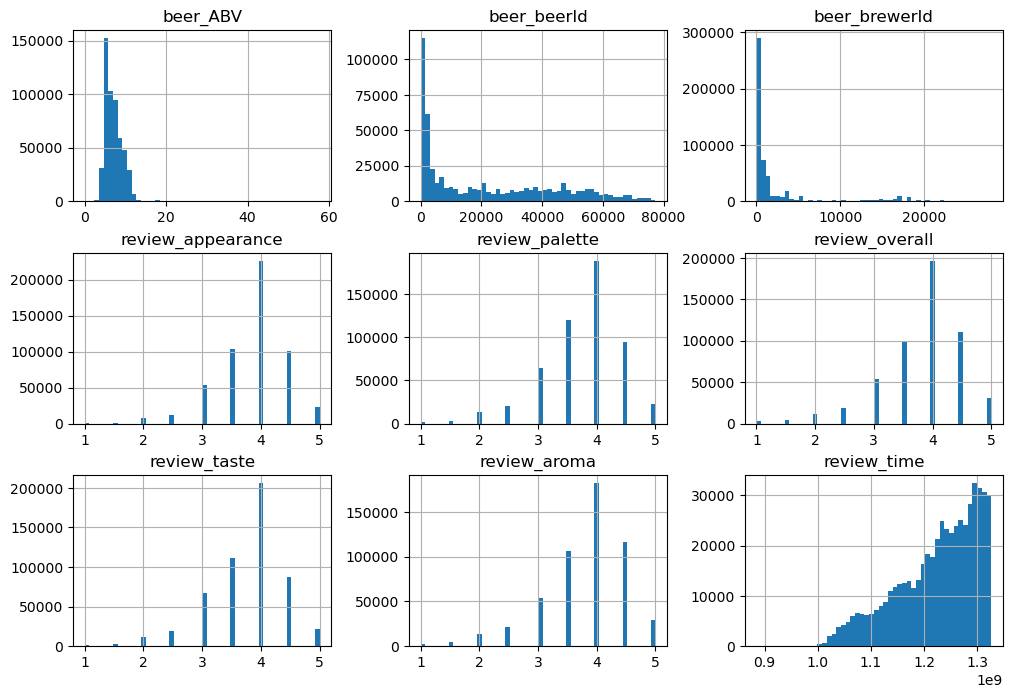

In [17]:
df_numerical.hist(bins=50, figsize=(12, 8))
plt.show()

Some histograms are slightly skewed left: they extend a little farther to the left of the median than to the left. This may make it a bit harder for some machine learning algorithms to detect patterns. Later, we'll try transforming these attributes to have more symmetrical and bell-shaped distributions.

# Q1. Rank the top 3 breweries which produce the strongest beers. Here the strongest means the most beer volumns by average.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            528870 non-null  float64
 1   beer_beerId         528870 non-null  int64  
 2   beer_brewerId       528870 non-null  int64  
 3   beer_name           528870 non-null  object 
 4   beer_style          528870 non-null  object 
 5   review_appearance   528870 non-null  float64
 6   review_palette      528870 non-null  float64
 7   review_overall      528870 non-null  float64
 8   review_taste        528870 non-null  float64
 9   review_profileName  528755 non-null  object 
 10  review_aroma        528870 non-null  float64
 11  review_text         528751 non-null  object 
 12  review_time         528870 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 52.5+ MB


In [19]:
df1 = df.groupby(['beer_beerId'])['beer_ABV'].mean().reset_index()

In [20]:
df1 = df1.rename(columns={'beer_ABV':'beer_ABV_average'})

In [21]:
df1['rank'] = df1['beer_ABV_average'].rank(method="min", ascending=False)

In [22]:
df1[df1['rank']<=3]

,beer_beerId,beer_ABV_average,rank
14144,55712,39.44,3.0
14718,57856,43.00,2.0
19032,73368,57.70,1.0


In [23]:
df1[df1['rank']<=3]['beer_beerId']

14144    55712
14718    57856
19032    73368
Name: beer_beerId, dtype: int64

In [24]:
df1

,beer_beerId,beer_ABV_average,rank
0,3,7.017442,4092.0
1,4,7.017442,4092.0
2,5,4.500000,18022.0
3,6,5.600000,12772.0
4,7,4.200000,18944.0
...,...,...,...
20195,77302,6.500000,10333.0
20196,77303,5.800000,12307.0
20197,77305,6.600000,10230.0
20198,77307,5.500000,13040.0


<Axes: >

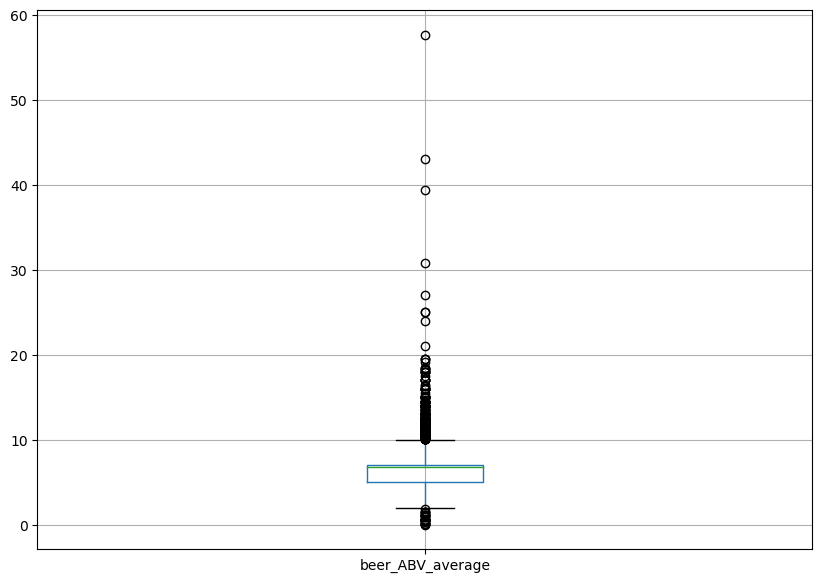

In [25]:
# distribution of the average beer ABV that different breweries make
df1.boxplot(column="beer_ABV_average", figsize=(10, 7))

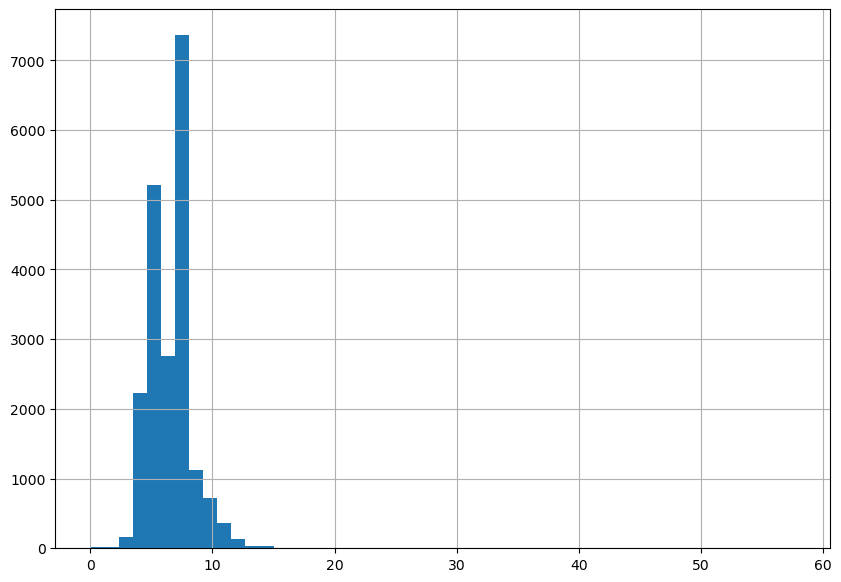

In [26]:
# distribution of occurency of the average beer ABV
df1["beer_ABV_average"].hist(bins=50, figsize=(10, 7))
plt.show()

# Q2. Which year did beers enjoy the highest ratings?

In [27]:
df_new = df

In [28]:
df_new["review_year"] = pd.to_datetime(df_new["review_time"], unit="s").dt.year

In [29]:
df_new["review_year"].value_counts()

2011    110836
2010     93810
2009     83578
2008     69080
2007     46514
2006     43083
2005     29433
2004     22905
2003     18187
2002      7581
2012      3180
2001       602
2000        33
1999        25
1998        23
Name: review_year, dtype: int64

In [30]:
df2_rating = df_new.groupby(['review_year'])['review_overall'].mean().reset_index()

In [31]:
df2_rating = df2_rating.rename(columns={'review_overall':'review_overall_average'})

In [32]:
df2_rating['rank']=df2_rating['review_overall_average'].rank(method='min', ascending=False)

In [33]:
df2_rating

,review_year,review_overall_average,rank
0,1998,3.891304,4.0
1,1999,4.000000,2.0
2,2000,4.181818,1.0
3,2001,3.927741,3.0
4,2002,3.799301,12.0
5,2003,3.752900,15.0
6,2004,3.794630,14.0
7,2005,3.832042,8.0
8,2006,3.798192,13.0
9,2007,3.809552,11.0


In [34]:
df2_rating[df2_rating['rank']==1]

,review_year,review_overall_average,rank
2,2000,4.181818,1.0


In 2000, beers got the highest average ratings 4.18.

In [35]:
df2_count = df_new.groupby(['review_year']).size().to_frame('no_of_reviews').reset_index()

In [36]:
df2_count

,review_year,no_of_reviews
0,1998,23
1,1999,25
2,2000,33
3,2001,602
4,2002,7581
5,2003,18187
6,2004,22905
7,2005,29433
8,2006,43083
9,2007,46514


In [37]:
df2 = df2_rating.merge(right=df2_count, how='inner', on='review_year')

In [38]:
df2.head()

,review_year,review_overall_average,rank,no_of_reviews
0,1998,3.891304,4.0,23
1,1999,4.000000,2.0,25
2,2000,4.181818,1.0,33
3,2001,3.927741,3.0,602
4,2002,3.799301,12.0,7581


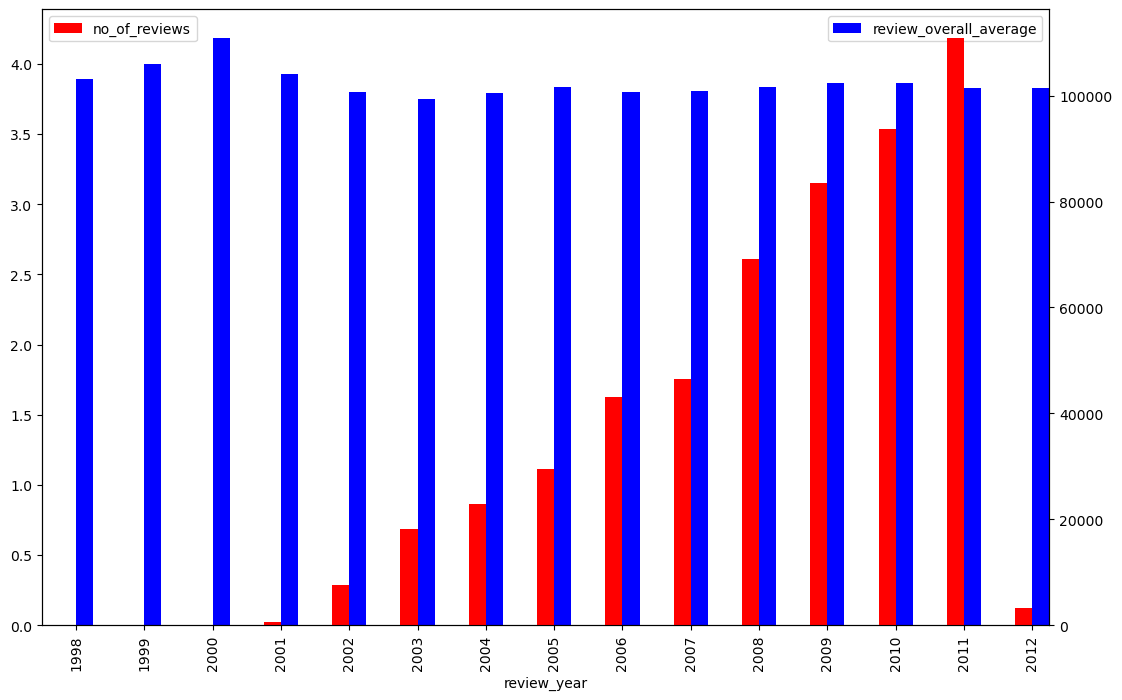

In [39]:
figure = plt.figure(figsize=(13,8))
ax1 = figure.add_subplot(111)
ax2 = ax1.twinx()
df2.plot(x='review_year', y='review_overall_average', kind='bar', color='blue', ax=ax1, width=0.25, position=0)
df2.plot(x='review_year', y='no_of_reviews', kind='bar', color='red', ax=ax2, width=0.25, position=1)
plt.legend(loc='upper left')
plt.show()

In 2000, there are only 33 reivews, which may be too small compared to other years. Therefore it is not reliable to say 2000 is the answer. 2010 has the second most number of reviews and the rating ranks at 5th position. It is convincing to say in 2010 beers enjoy the highest rating.  

# Q3. Based on the users' ratings, which factors are important among taste, aroma, appearance, and palette?

In [40]:
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,review_year
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823,2009
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097,2009
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604,2009
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145,2009
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206,2010


To explore the correlation between factors and overall ratings, we need to group the dataset by beer_beerId.

In [41]:
df['beer_beerId'].value_counts()

1904     3000
276      2587
11757    2502
2671     2492
34       2483
         ... 
73328       1
73785       1
70614       1
58898       1
47986       1
Name: beer_beerId, Length: 20200, dtype: int64

In [42]:
df3 = df.groupby(['beer_beerId'])[['review_overall', 'review_appearance', 'review_palette', 'review_taste', 'review_aroma']].mean()

In [43]:
corr = df3.corr(method='pearson')

In [44]:
corr

,review_overall,review_appearance,review_palette,review_taste,review_aroma
review_overall,1.000000,0.614811,0.747209,0.809606,0.873744
review_appearance,0.614811,1.000000,0.647671,0.659610,0.637411
review_palette,0.747209,0.647671,1.000000,0.736896,0.813106
review_taste,0.809606,0.659610,0.736896,1.000000,0.821956
review_aroma,0.873744,0.637411,0.813106,0.821956,1.000000


<Axes: >

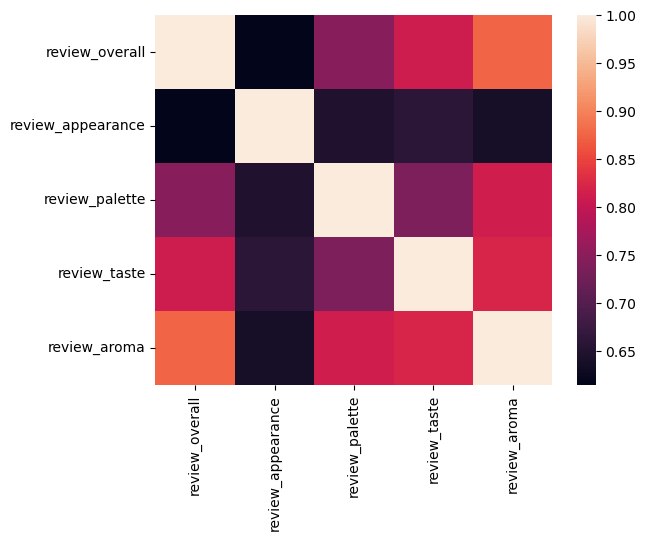

In [45]:
sns.heatmap(corr)

Aroma is the most important facor,because it has the highest correlation coefficient with the overall review. Aroma is followed by taste, palette and lastly appearance. 

# Q4. If you were to recommend 3 beers to your friends based on this data, which ones would you recommend?

We will recommend beerIds with highest ratings and considerable amounts of reviews. 

In [46]:
df4 = df.groupby(['beer_beerId'])['review_overall'].agg(['mean','count'])

In [47]:
df4 = df4.rename(columns={'mean':'review_overall_average', 'count':'no_of_reviews'})

In [48]:
df4 = df4.sort_values(by='review_overall_average', ascending=False)

Let us look at the 5 beers with highest ratings and their review counts.

In [49]:
df4.head(5)

,review_overall_average,no_of_reviews
beer_beerId,,
62812,5.0,1
76563,5.0,1
54714,5.0,1
1734,5.0,1
42766,5.0,1


Each of them has full rating but only gets one review. It means the rating is pointless. We need to see the distribution of no_of_reviews.

In [50]:
df4.describe()

,review_overall_average,no_of_reviews
count,20200.000000,20200.000000
mean,3.651880,26.181683
std,0.631110,123.799950
min,1.000000,1.000000
25%,3.399774,1.000000
50%,3.750000,2.000000
75%,4.000000,7.000000
max,5.000000,3000.000000


<Axes: >

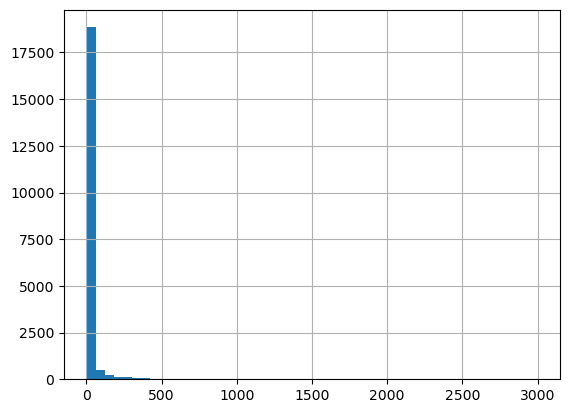

In [51]:
df4['no_of_reviews'].hist(bins=50)

Most of counts fall under 500. We should choose a cutoff no_of_review number, above which the corresponding rating is acceptable. How about 200?

In [52]:
df4[df4['no_of_reviews']>200].head(10)

,review_overall_average,no_of_reviews
beer_beerId,,
56082,4.630952,252
16814,4.625800,469
47658,4.591052,637
6368,4.488671,662
2899,4.432056,287
19960,4.397516,1932
15881,4.395652,1955
8954,4.373278,363
37586,4.371233,365


Here are the three beer ids: 56082, 16814 and 47658. Their complete information are as follows:

In [53]:
df[(df['beer_beerId']==56082) | (df['beer_beerId']==16814) | (df['beer_beerId']==47658)].drop_duplicates(subset="beer_beerId")

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,review_year
16176,10.6,47658,1199,Founders CBS Imperial Stout,American Double / Imperial Stout,4.5,4.5,4.5,5.0,ColForbinBC,4.5,750mL bottle poured into a snifter Pours an in...,1321818225,2011
334853,8.0,56082,14064,Citra DIPA,American Double / Imperial IPA,4.0,4.5,4.5,4.0,IdrinkGas,4.5,Poured from a bomber into a Lost Abbey tulip. ...,1314513820,2011
378400,8.0,16814,27039,Heady Topper,American Double / Imperial IPA,4.5,5.0,4.5,4.5,onefmatt,4.5,"A+ in my book, just a fantastic and well round...",1321078004,2011


# Q5. Which beer style seems to be the favourite based on the reviews written by users? How does written reviews compare to overall review score for the beer style?

In [22]:
download('vader_lexicon', quiet=True)

True

In [23]:
analyser = SentimentIntensityAnalyzer()

In [24]:
df_new5 = df
df_new5['review_sentiment'] = df_new5['review_text'].apply(lambda x: analyser.polarity_scores(text=x)['compound'])

In [28]:
df_new5.groupby(['beer_style'])['review_sentiment'].agg(func=['mean', 'count']).sort_values(by='mean', ascending=False)

,mean,count
beer_style,,
Quadrupel (Quad),0.857887,4934
Dortmunder / Export Lager,0.852428,1809
Braggot,0.850789,199
Flanders Red Ale,0.849521,2858
American Double / Imperial Stout,0.847821,23354
...,...,...
Happoshu,0.533456,55
American Malt Liquor,0.524613,1411
Japanese Rice Lager,0.519356,496


Quadrupel (Quad) is the most favorite beer style and its number of reviews also tops among others. 

In [30]:
df5 = df_new5[df_new5['beer_style'] == 'Quadrupel (Quad)']

In [31]:
df5[["review_sentiment", "review_overall"]].corr()

,review_sentiment,review_overall
review_sentiment,1.000000,0.258732
review_overall,0.258732,1.000000


<Axes: >

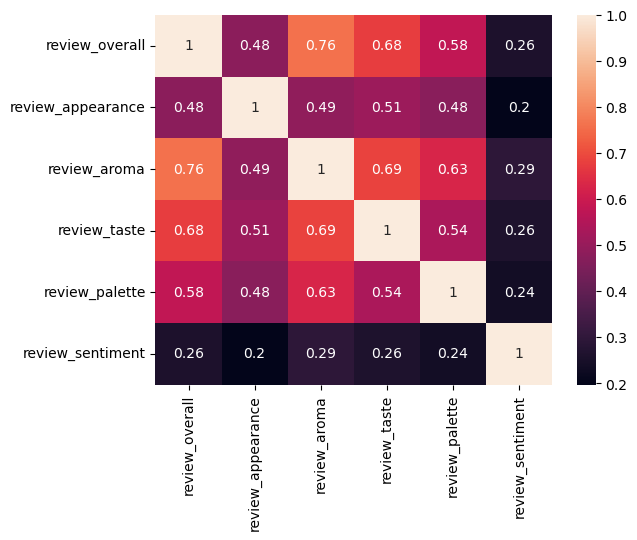

In [33]:
sns.heatmap(data=df5[[
    "review_overall",
    "review_appearance",
    "review_aroma",
    "review_taste",
    "review_palette",
    "review_sentiment"
]].corr(), annot=True)

The correlation between review_sentiment and review_overall is 0.26, positive but low. It means two things:
1. The better the review, the higher the score.
2. People may give a high rating but leave a neutral comment.